### Notebook to compute and visualise cellular proportions on TB

- **Developed by**: Carlos Talavera-López Ph.D
- **Institute of Computational Biology - Computational Health Centre - Helmholtz Munich**
- v221103

### Load required modules

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

### Set up working environment

In [2]:
plt.show()

sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 300, vector_friendly = True, format = 'svg')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                         9.2.0
asttokens                   NA
backcall                    0.2.0
beta_ufunc                  NA
binom_ufunc                 NA
cffi                        1.15.1
colorama                    0.4.5
cycler                      0.10.0
cython_runtime              NA
dateutil                    2.8.2
debugpy                     1.5.1
decorator                   5.1.1
entrypoints                 0.4
executing                   0.8.3
h5py                        3.7.0
hypergeom_ufunc             NA
ipykernel                   6.9.1
jedi                        0.18.1
joblib                      1.2.0
kiwisolver                  1.4.4
llvmlite                    0.39.1
matplotlib                  3.6.1
matplotlib_inline           NA
mpl_toolkits                NA
natsort                     8.2.0
nbinom_ufunc                NA
ncf_ufunc                   NA
numba                       0.56.2
numpy                   

### Read in data

In [3]:
tb_pbmc = sc.read_h5ad('/home/cartalop/data/single_cell/lung/tb/working_objects/CaiY_TB-PBMC_scnym_annotated_ctl221103.h5ad')
tb_pbmc

AnnData object with n_obs × n_vars = 145381 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'age', 'gender', 'status', 'data_type', 'centre', 'version', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets', 'object', 'protocol', 'dataset', 'scNym', 'scNym_confidence'
    var: 'gene_id', 'mt', 'ribo', 'n_cells_by_counts-caiy2020', 'mean_counts-caiy2020', 'pct_dropout_by_counts-caiy2020', 'total_counts-caiy2020', 'n_cells_by_counts-caiy2022', 'mean_counts-caiy2022', 'pct_dropout_by_counts-caiy2022', 'total_counts-caiy2022'
    layers: 'counts', 'sqrt_norm'

### Remove irrelevant cell types

In [4]:
tb_pbmc.obs['cell_type'] = tb_pbmc.obs['scNym'].copy()
tb_pbmc.obs['cell_type'].cat.categories

Index(['B invar', 'B n-sw mem', 'B n-sw mem IFN stim', 'B naive',
       'B naive IFN stim', 'B sw mem', 'Cycling', 'HPC', 'ILC', 'MAIT',
       'Monocyte CD14', 'Monocyte CD14 IFN stim', 'Monocyte CD16',
       'Monocyte CD16 IFN stim', 'Monocyte CD16+C1', 'NK', 'NK CD56',
       'NK IFN stim', 'Plasma cells', 'Platelets', 'RBC', 'T CD4 CTL',
       'T CD4 helper', 'T CD4 naive', 'T CD4 naive IFN stim', 'T CD8 CM',
       'T CD8 CTL', 'T CD8 EM', 'T CD8 EMRA', 'T CD8 naive', 'T g/d', 'T reg',
       'cDC2', 'pDC'],
      dtype='object')

### Create cell type label

### Visualise cell-proportions per disease

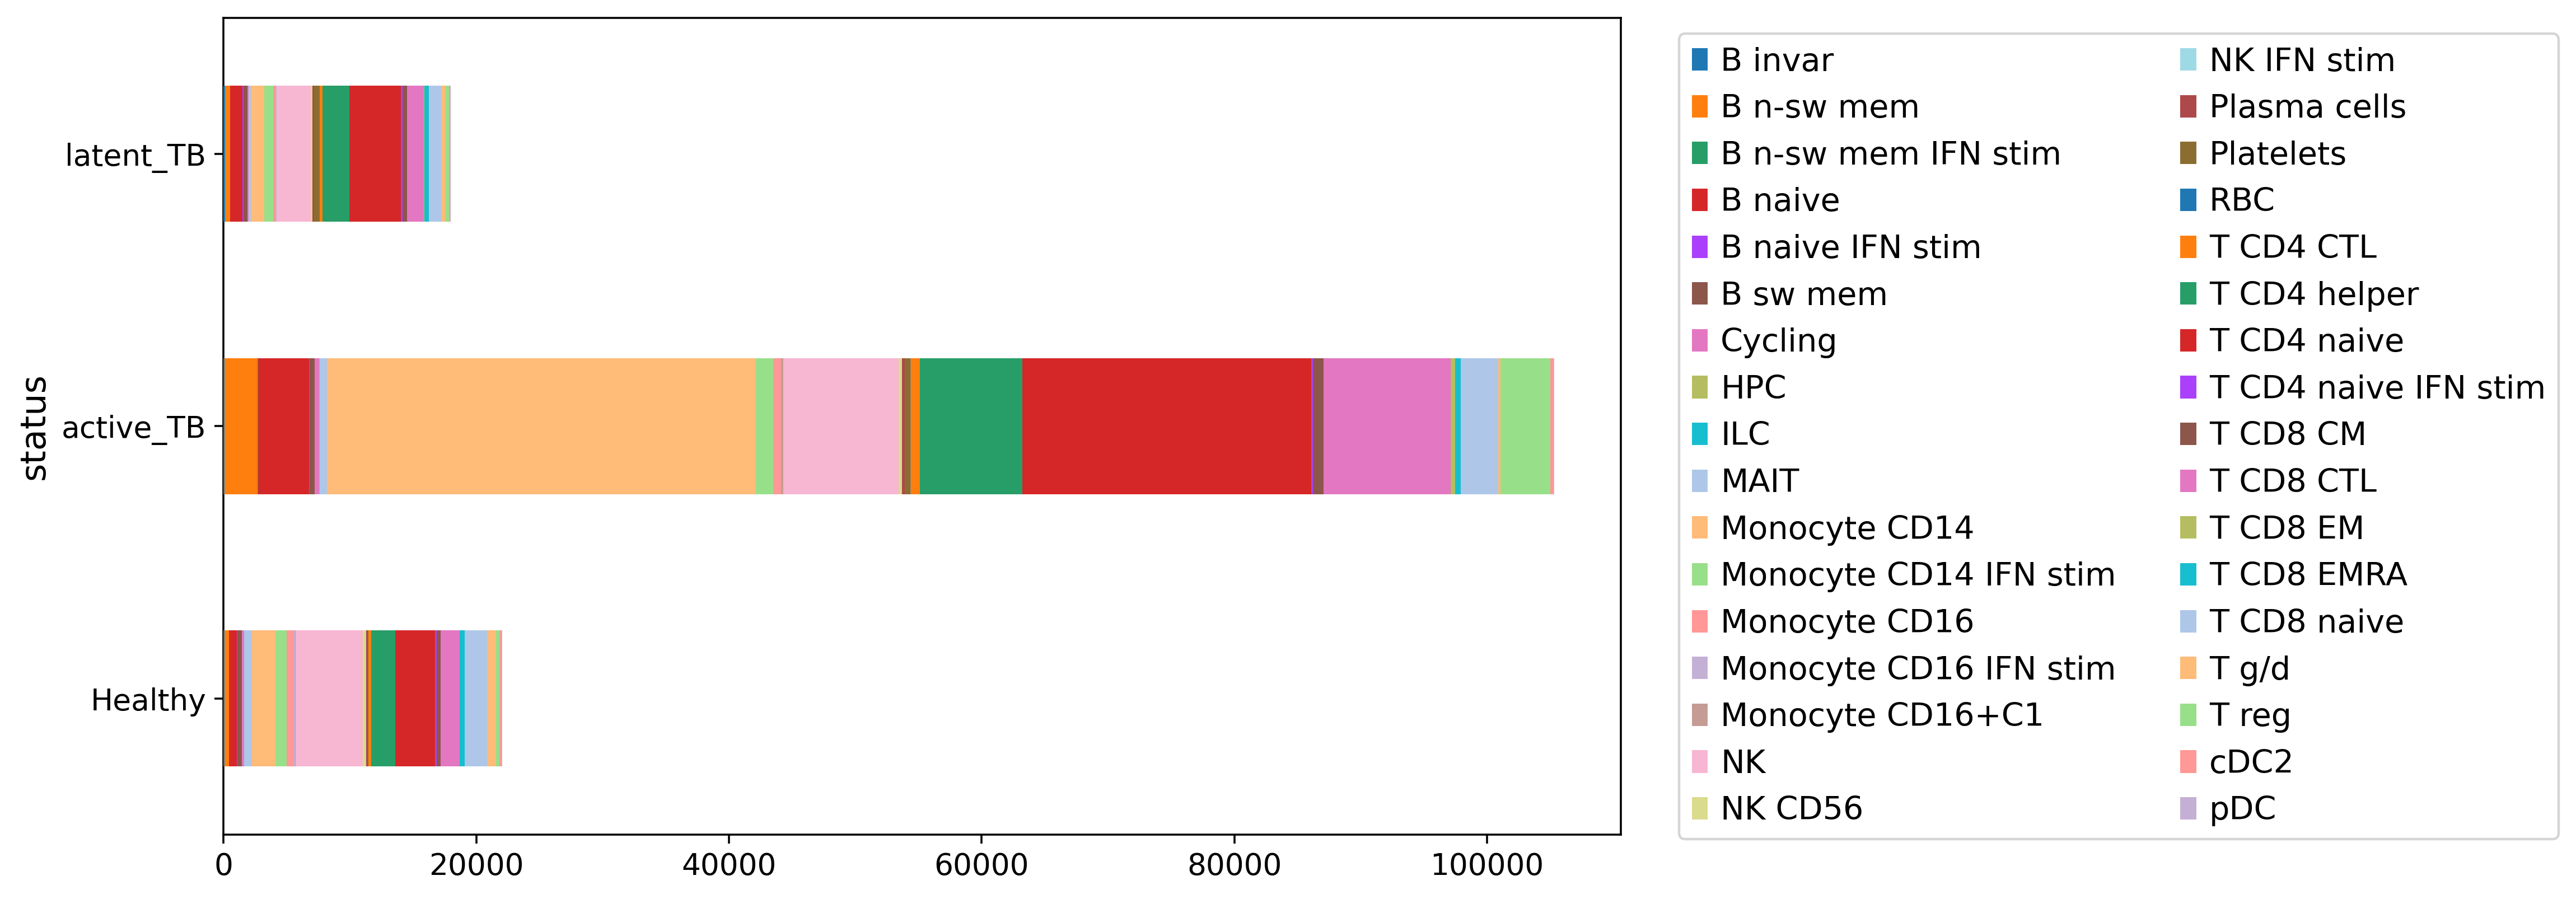

In [5]:
ax1 = pd.crosstab(tb_pbmc.obs['status'], tb_pbmc.obs['cell_type']).plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (10,6), fontsize = 12, grid = False)
horiz_offset = 1.03
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 2)

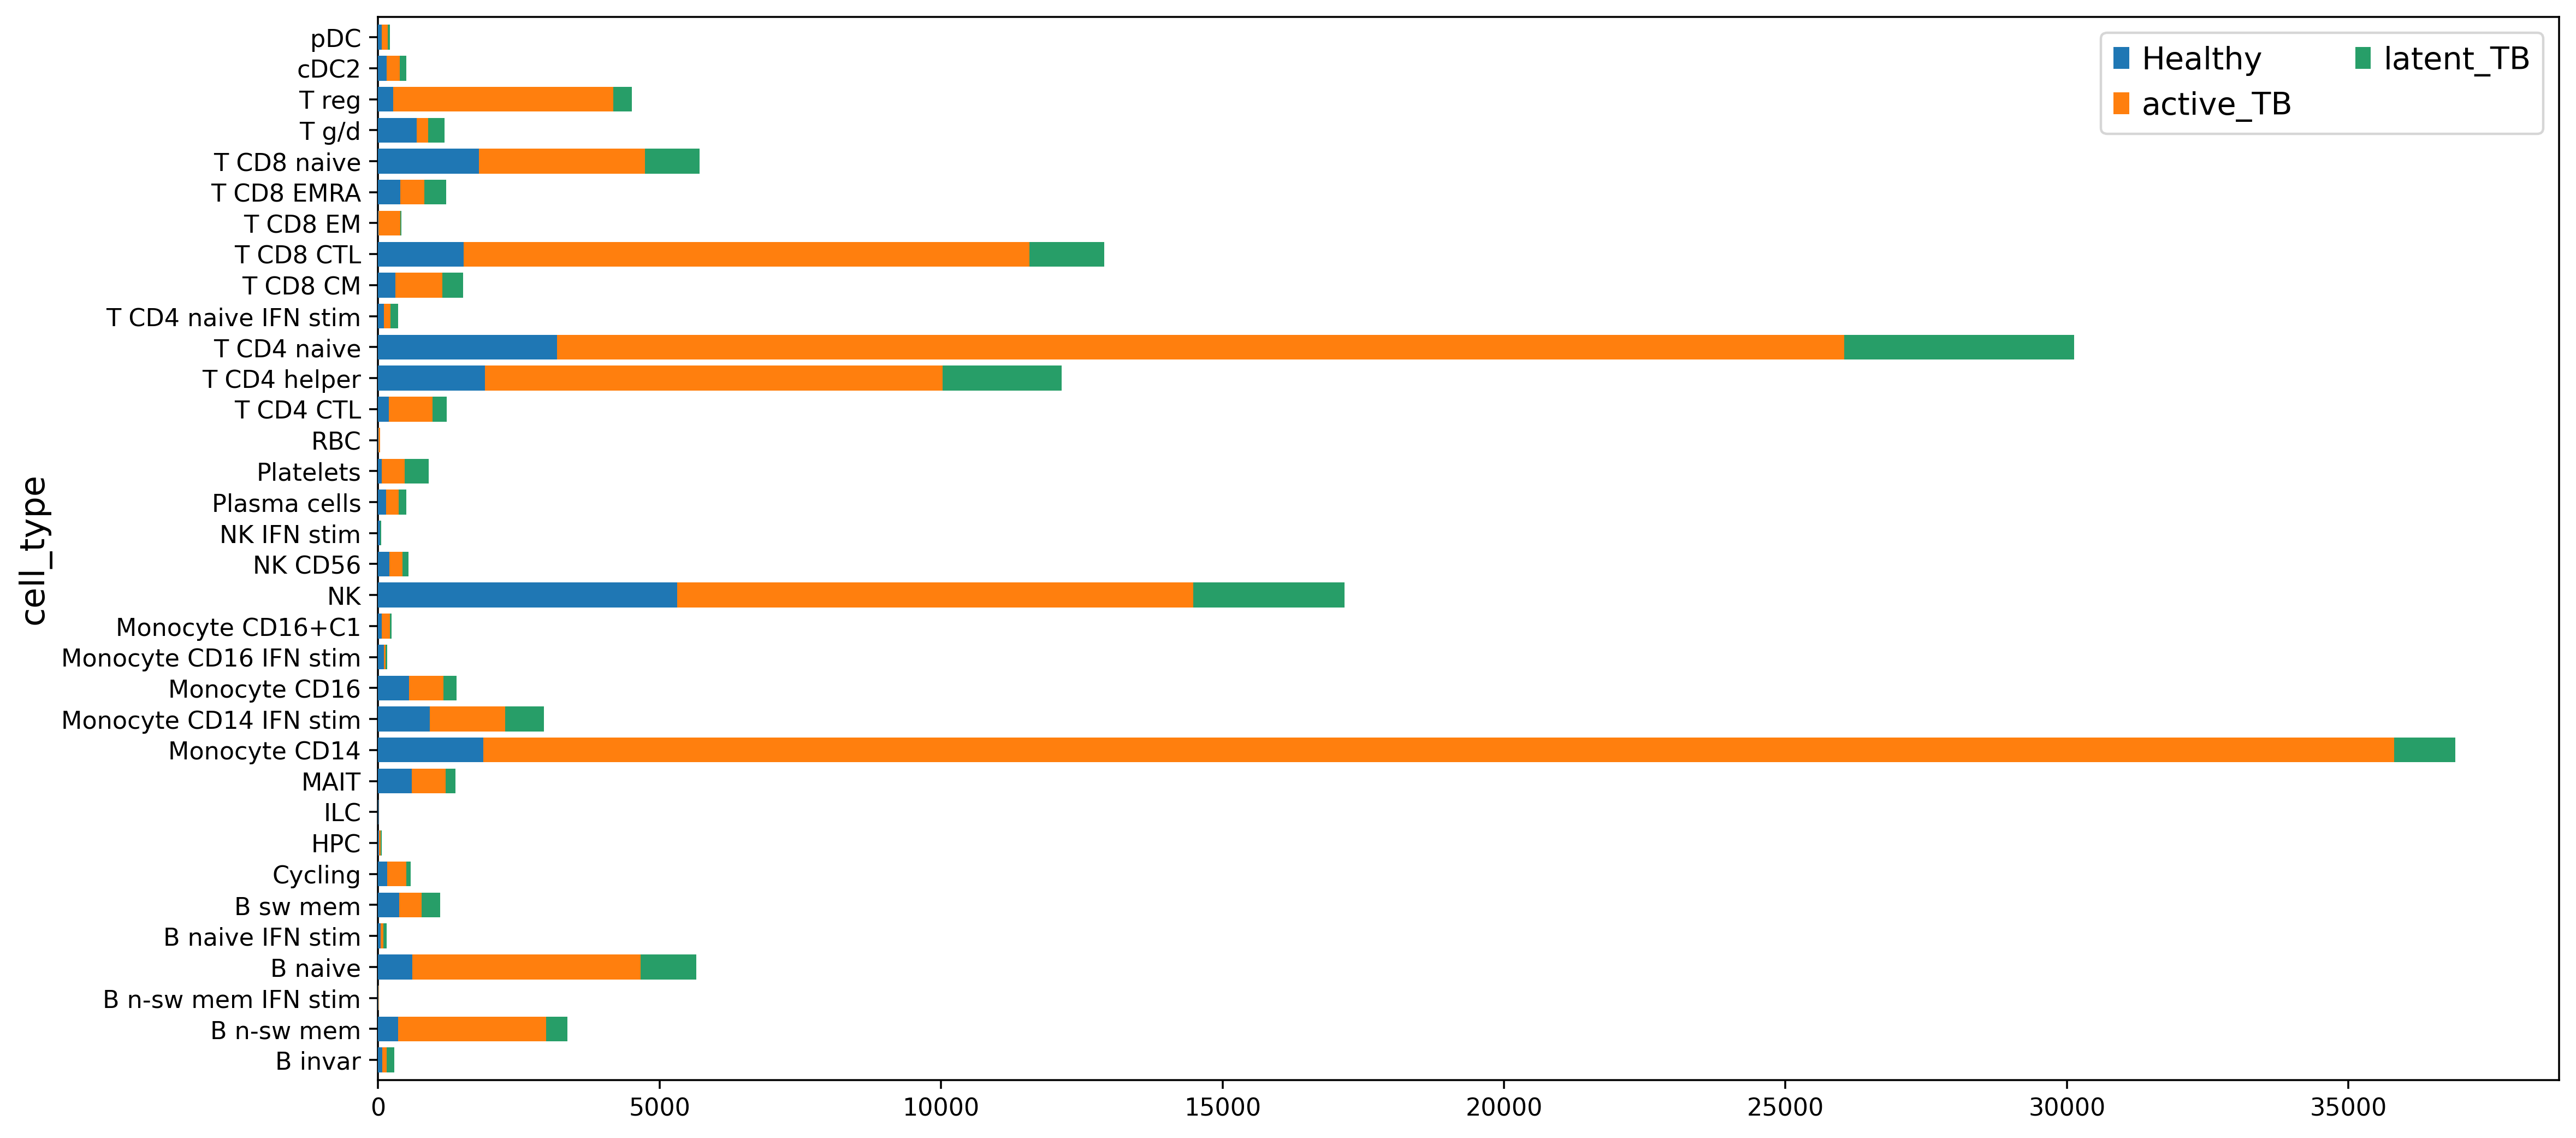

In [6]:
ax1 = pd.crosstab(tb_pbmc.obs['cell_type'], tb_pbmc.obs['status']).plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (16,8), fontsize = 10, grid = False, width = 0.8)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 2)

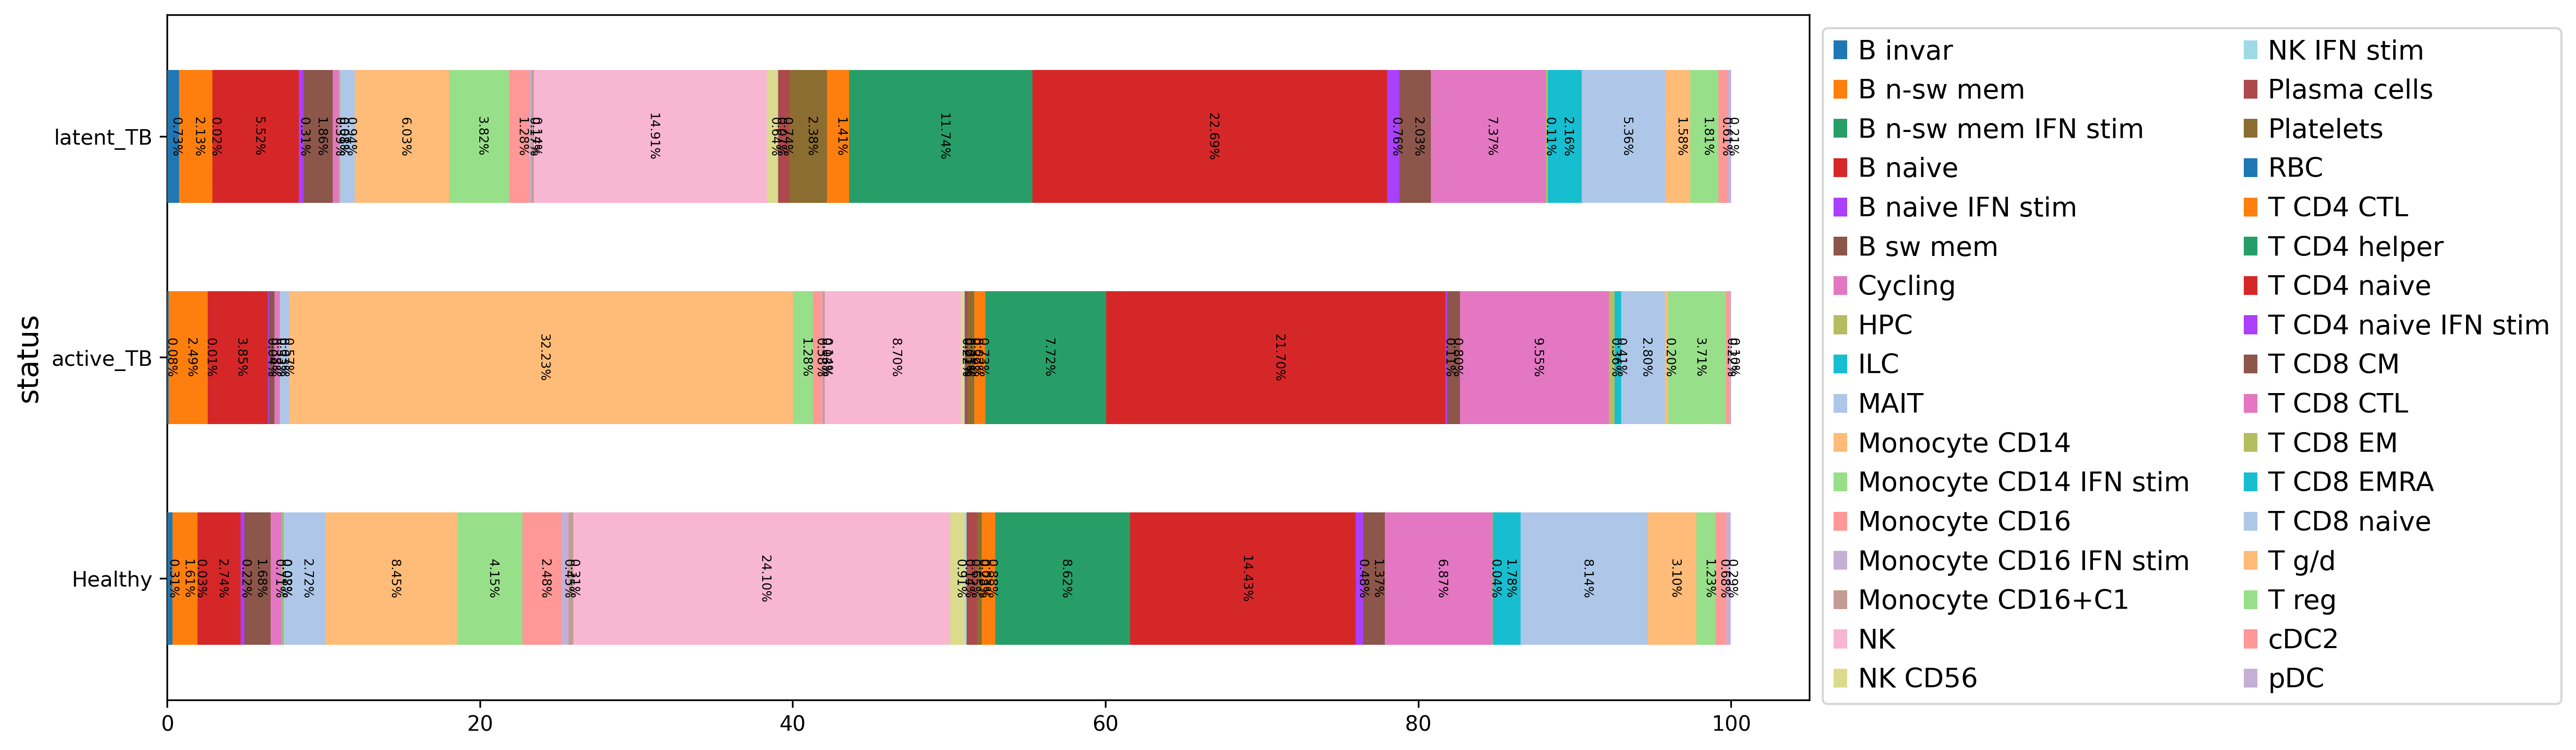

In [7]:
data = pd.crosstab(tb_pbmc.obs['status'], tb_pbmc.obs['cell_type'])
totals = data.sum(axis = 1)
percent = data.div(totals, axis = 0).mul(100).round(2)

ax1 = percent.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (14,6), fontsize = 10, grid = False, width = 0.6)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 2)

for c in ax1.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax1.bar_label(c, labels = labels, label_type = 'center', padding = 1, color = 'black', rotation = 270, fontsize = 6)

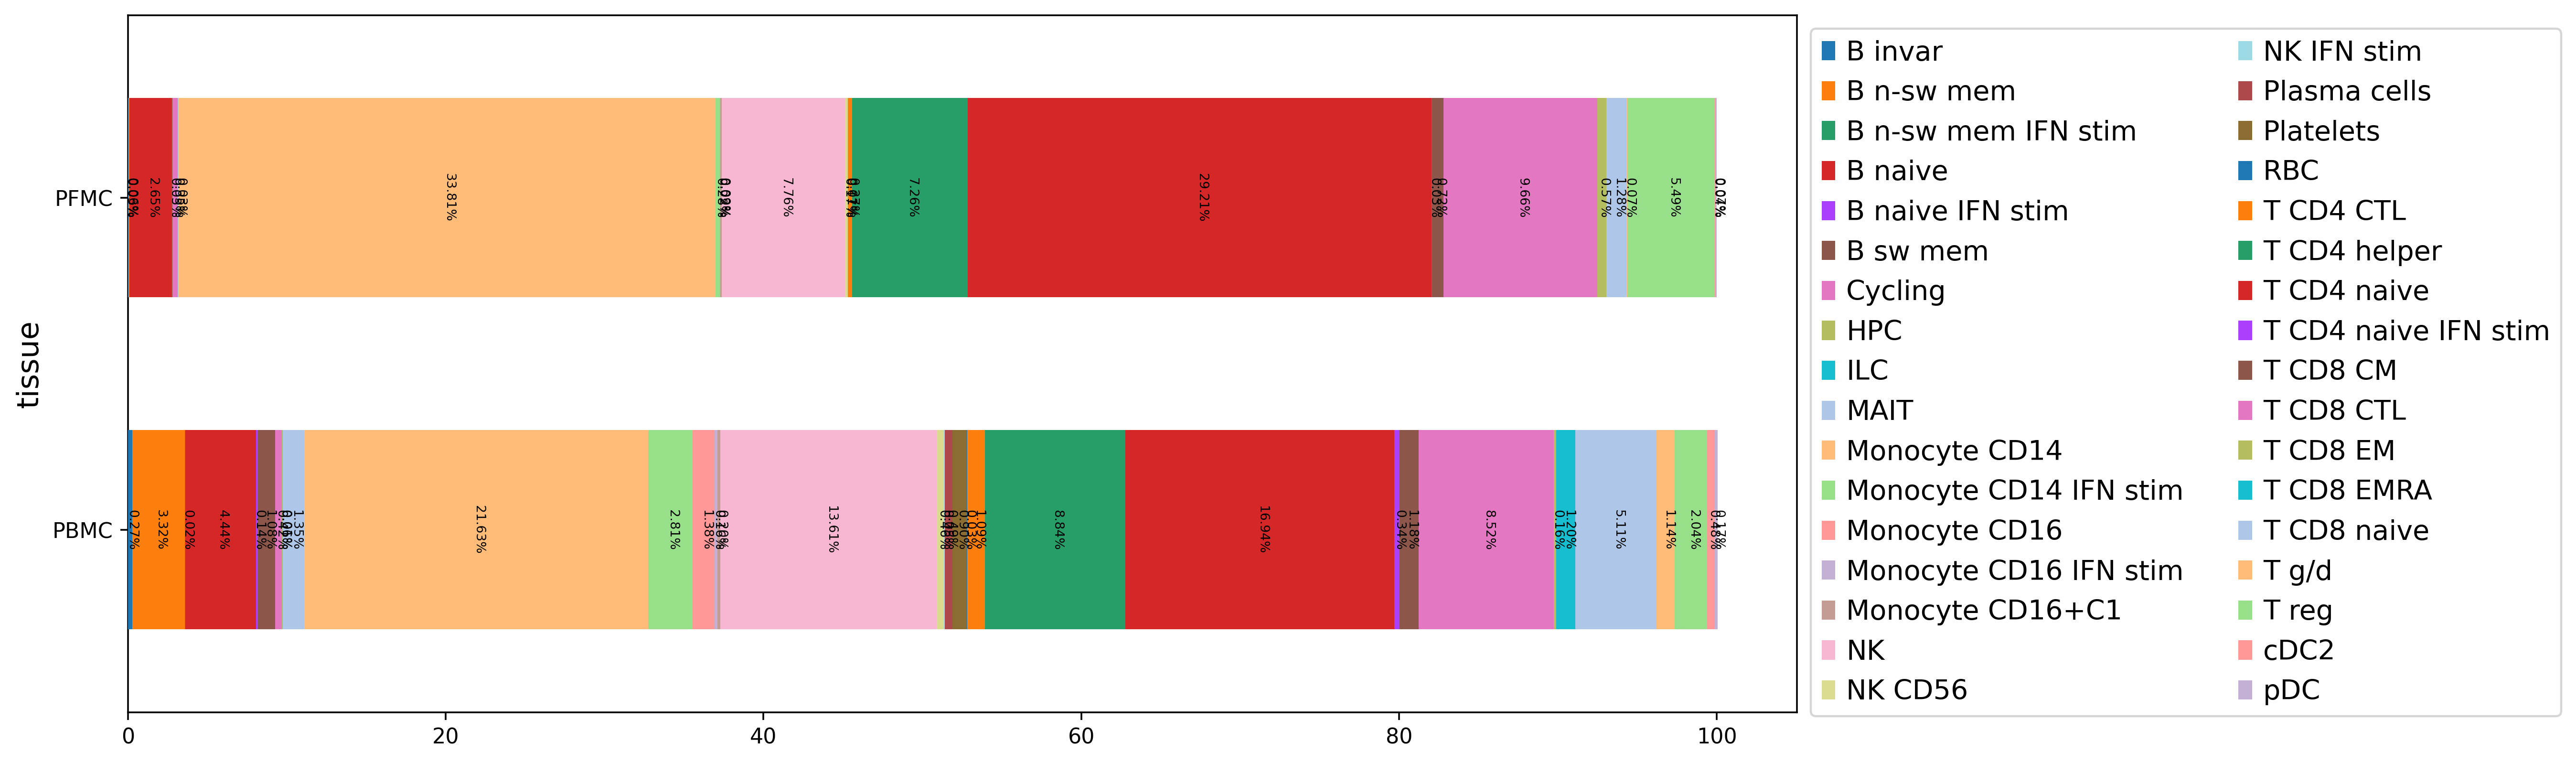

In [8]:
data = pd.crosstab(tb_pbmc.obs['tissue'], tb_pbmc.obs['cell_type'])
totals = data.sum(axis = 1)
percent = data.div(totals, axis = 0).mul(100).round(2)

ax1 = percent.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (14,6), fontsize = 10, grid = False, width = 0.6)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 2)

for c in ax1.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax1.bar_label(c, labels = labels, label_type = 'center', padding = 1, color = 'black', rotation = 270, fontsize = 6)

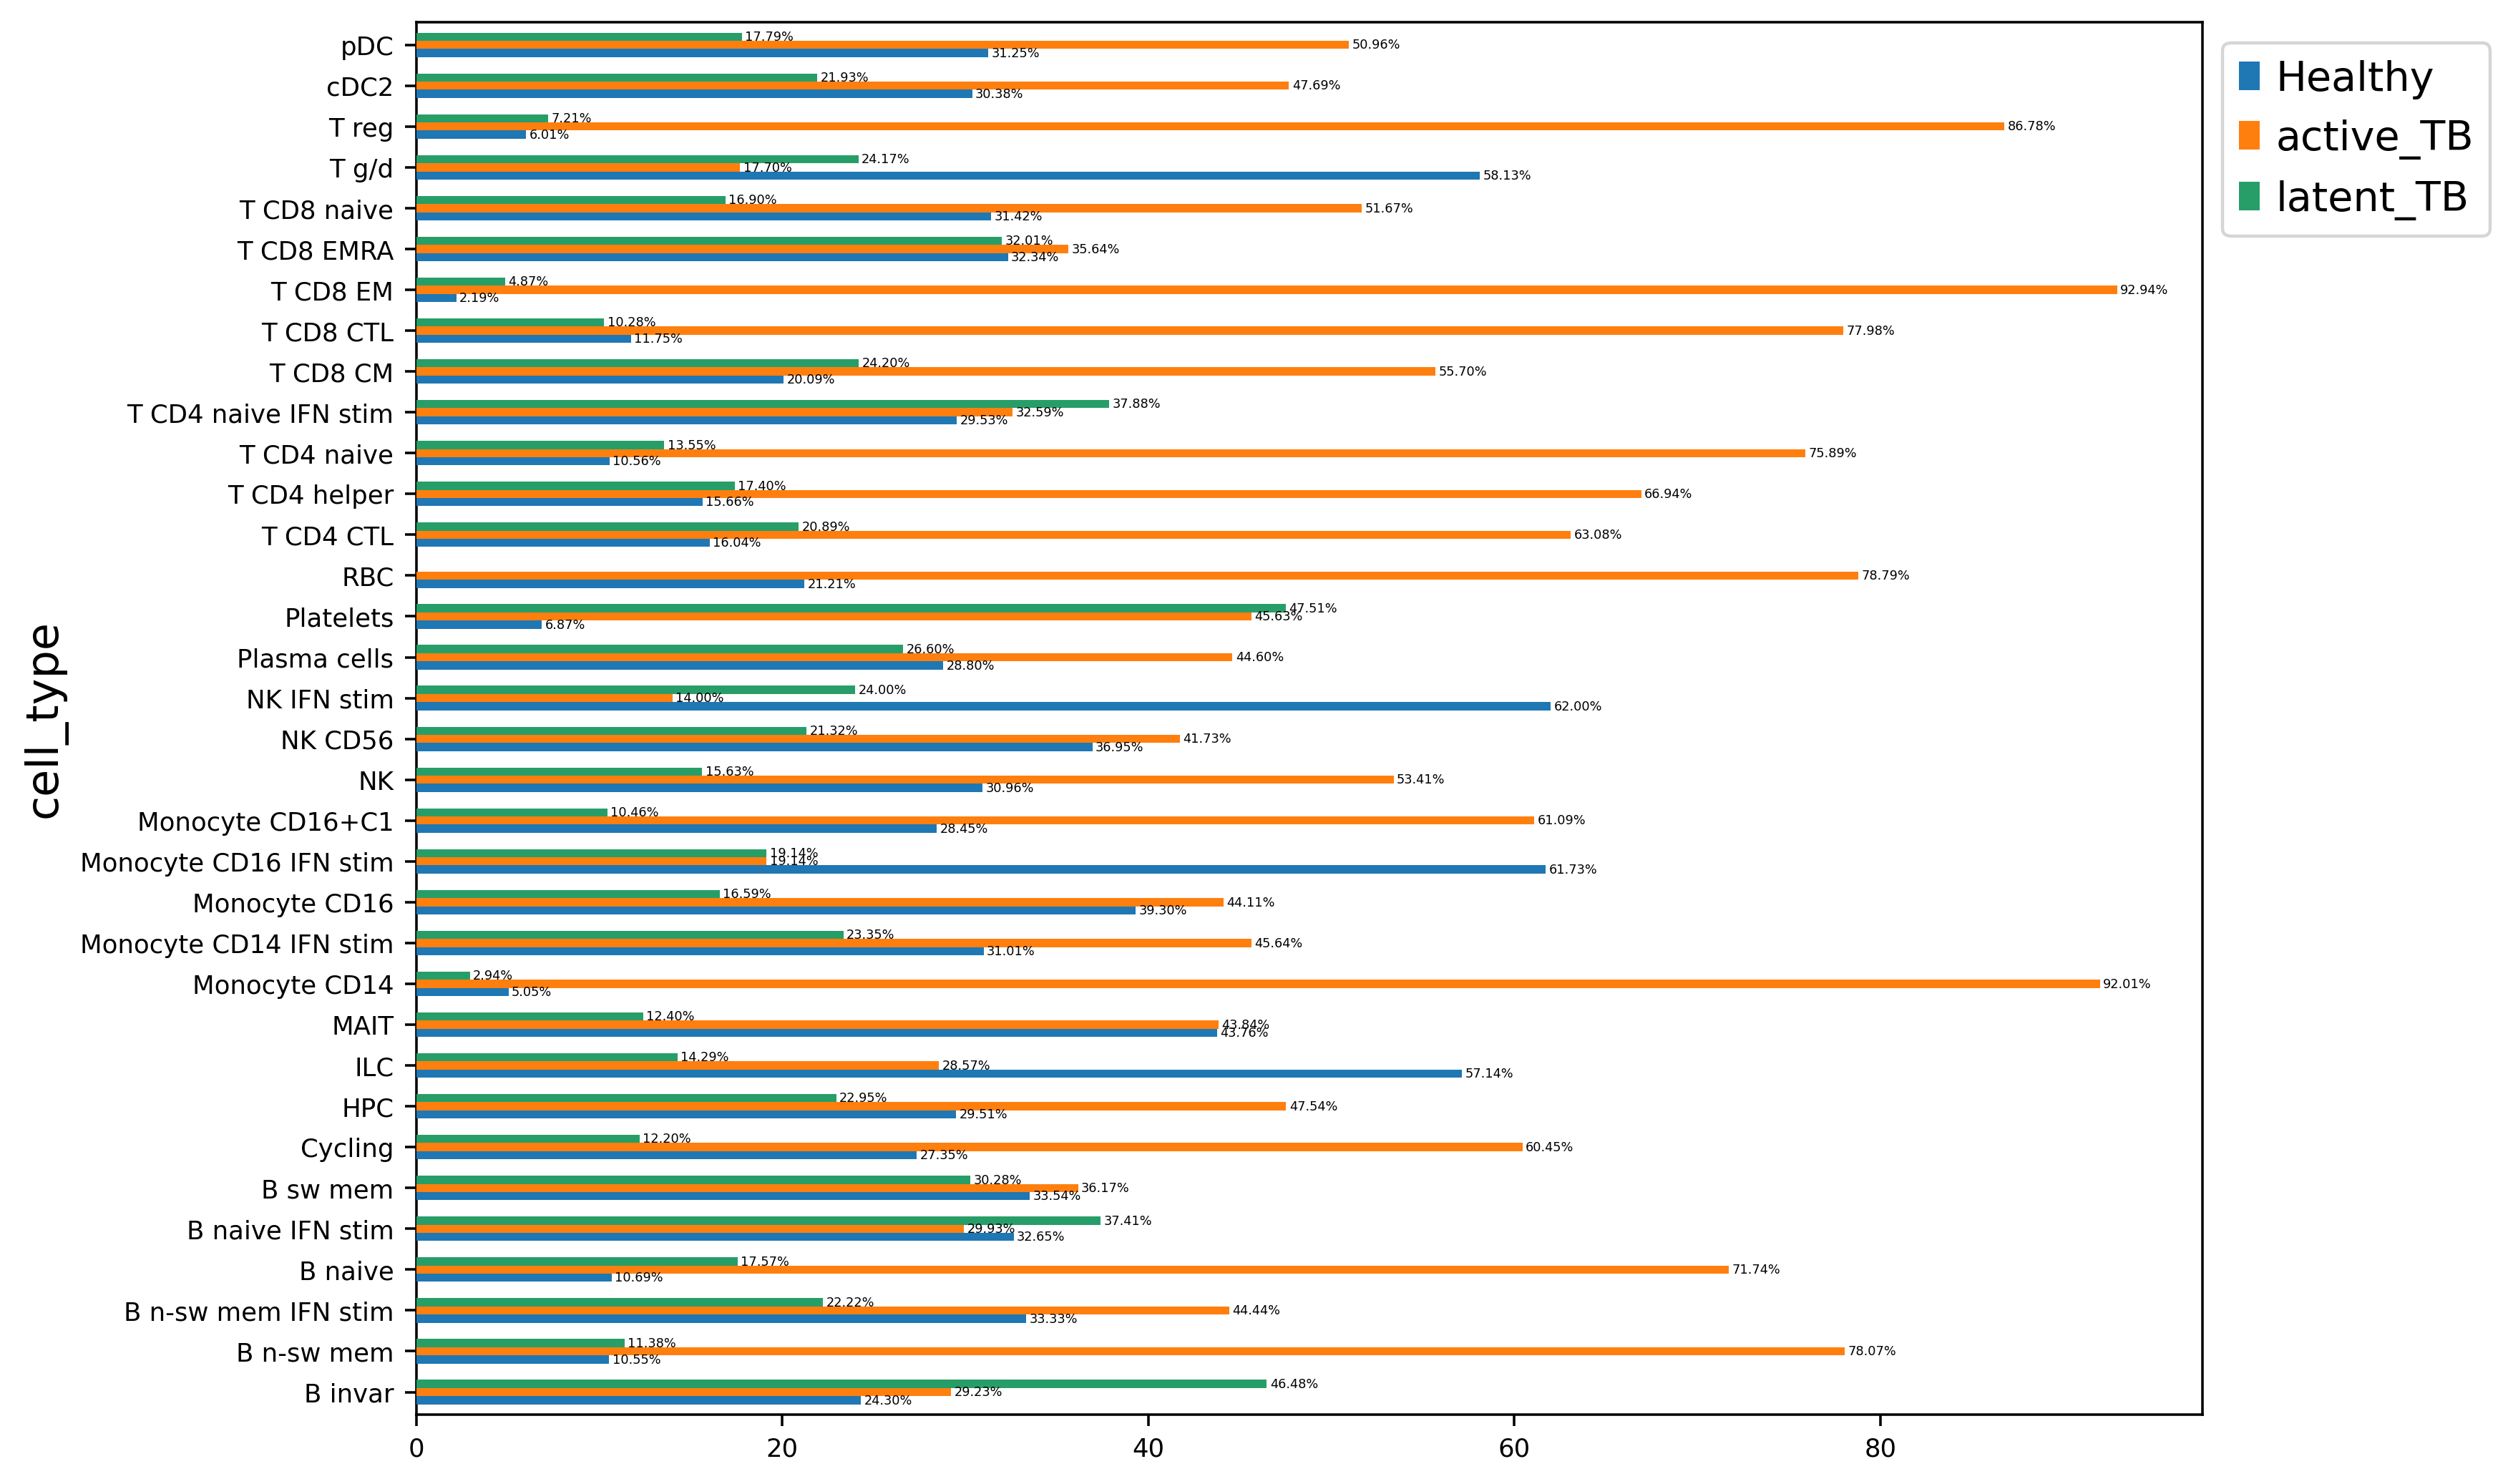

In [9]:
data = pd.crosstab(tb_pbmc.obs['cell_type'], tb_pbmc.obs['status'])
totals = data.sum(axis = 1)
percent = data.div(totals, axis = 0).mul(100).round(2)

ax1 = percent.plot.barh(stacked = False, edgecolor = 'none', zorder = 3, figsize = (10,8), fontsize = 8, grid = False, width = 0.6)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 1)

for c in ax1.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax1.bar_label(c, labels = labels, label_type = 'edge', padding = 1, color = 'black', rotation = 0, fontsize = 4)

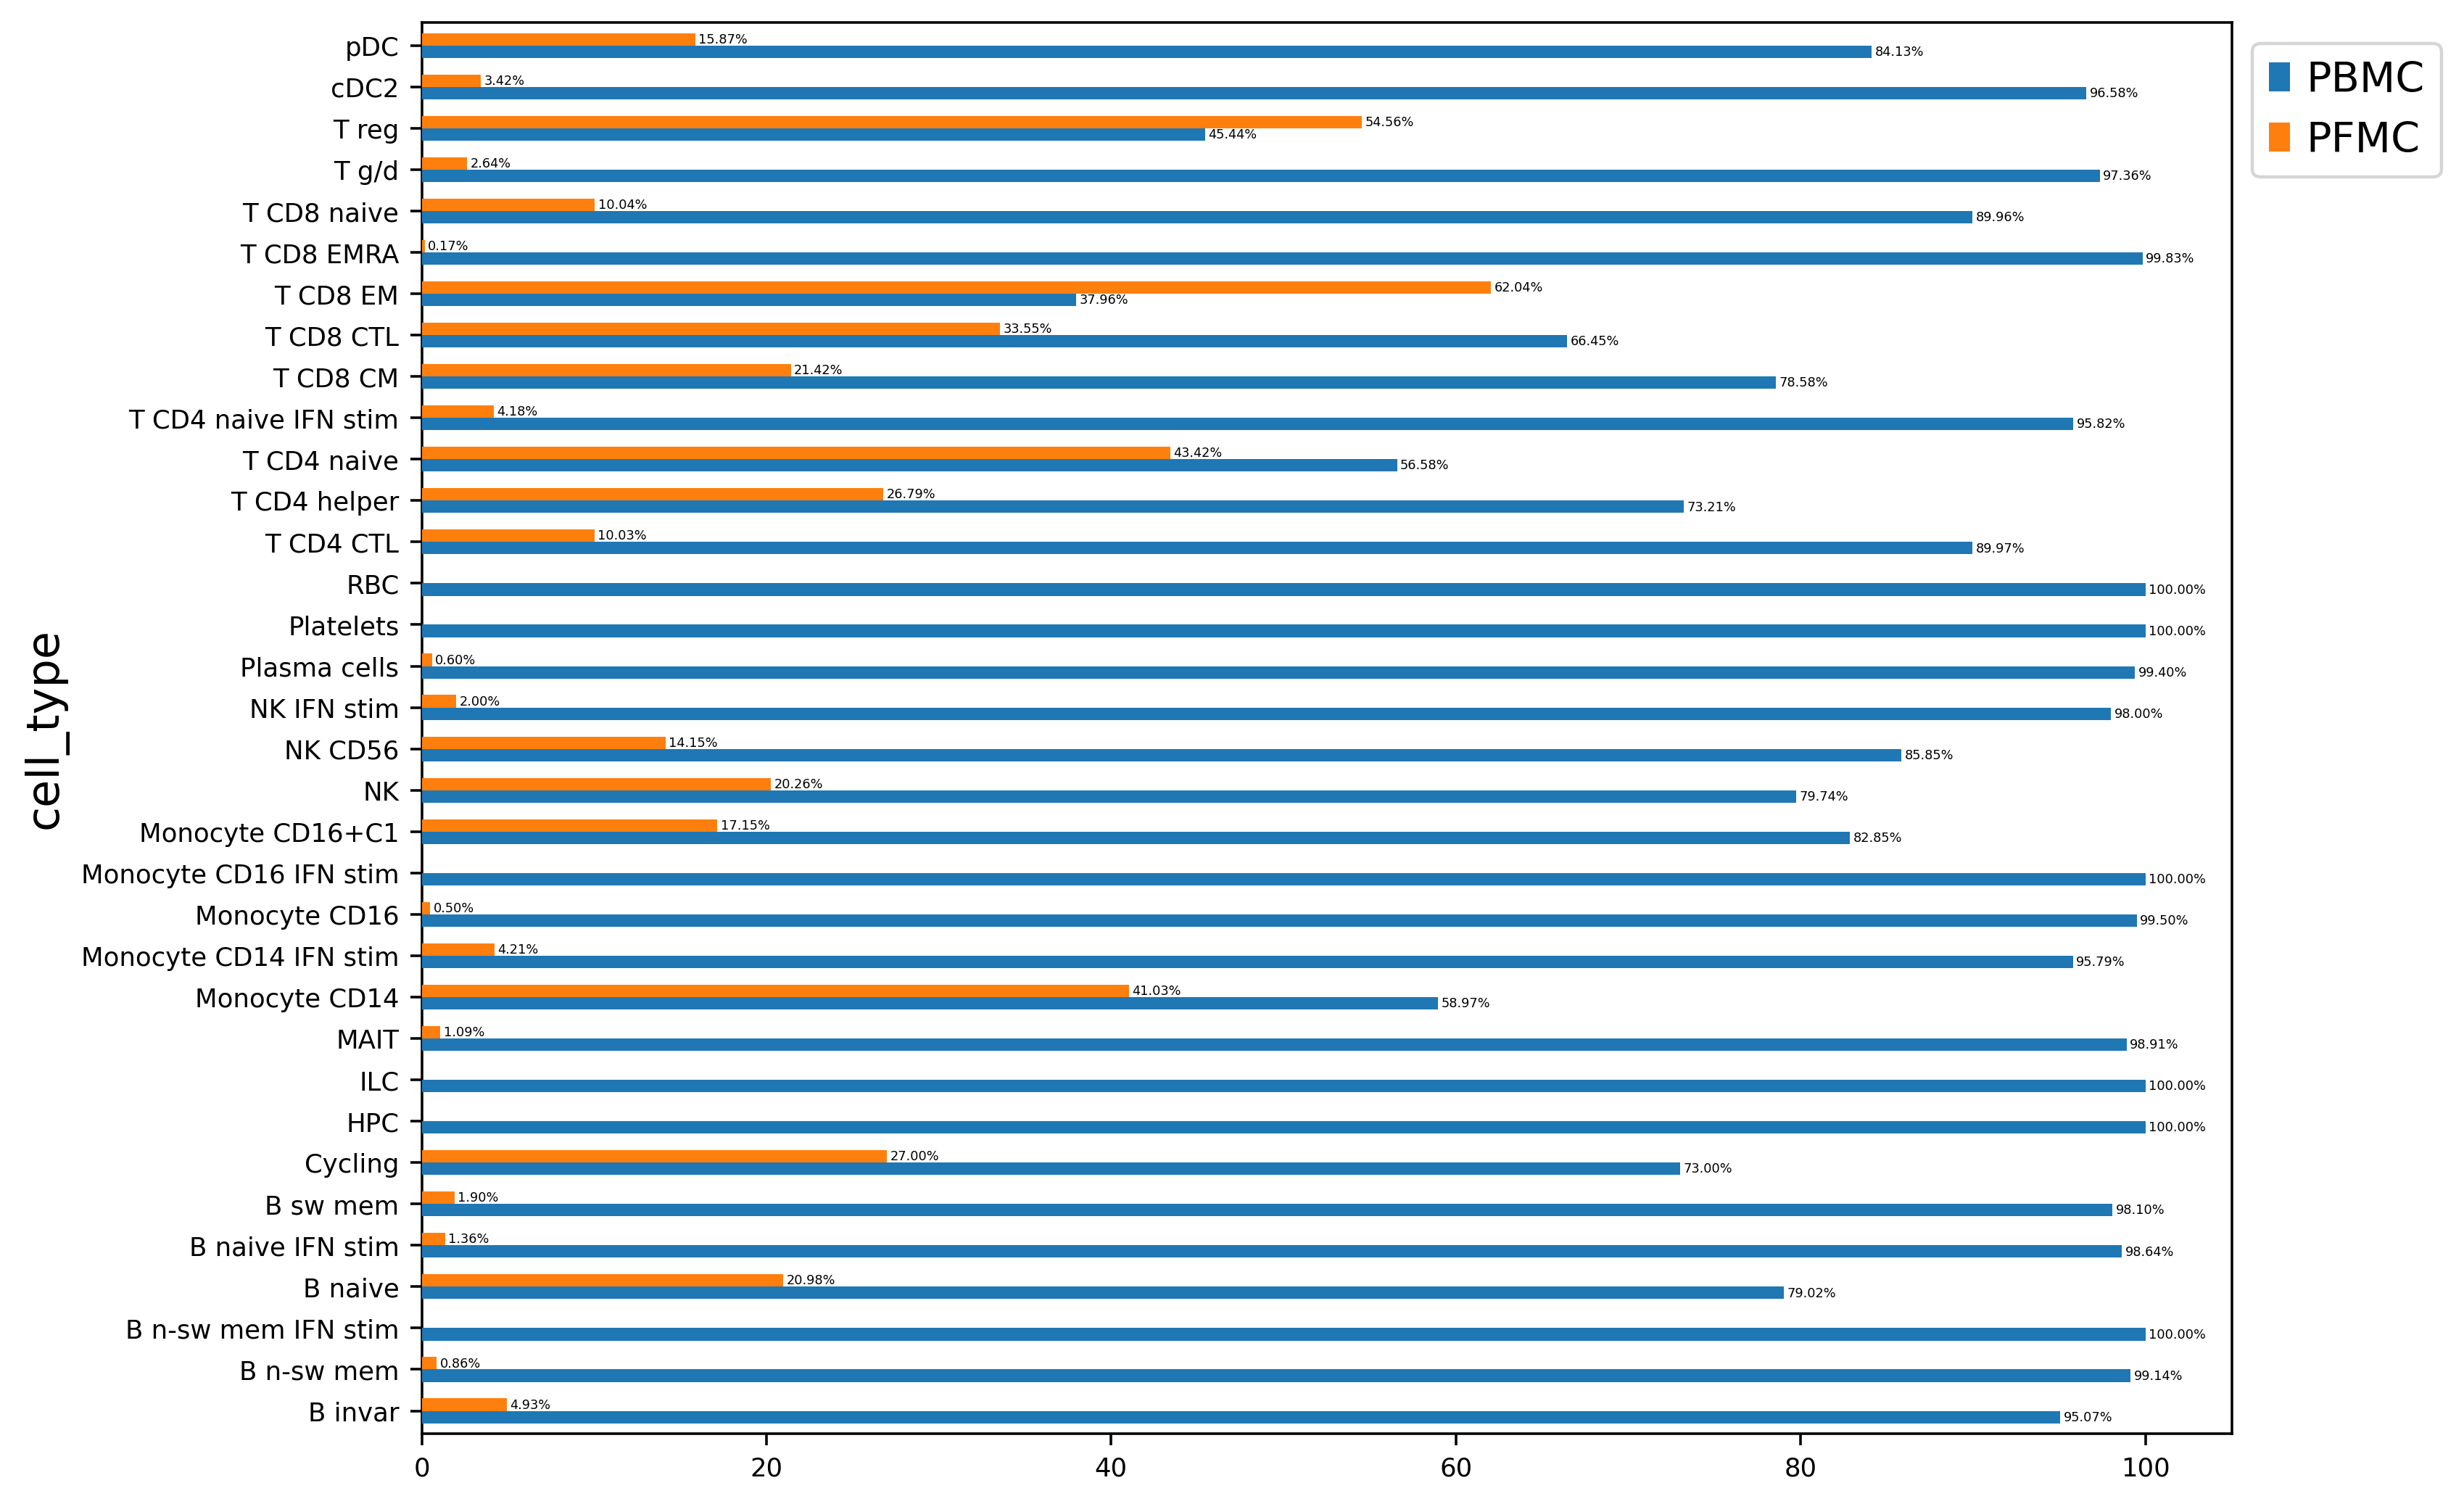

In [10]:
data = pd.crosstab(tb_pbmc.obs['cell_type'], tb_pbmc.obs['tissue'])
totals = data.sum(axis = 1)
percent = data.div(totals, axis = 0).mul(100).round(2)

ax1 = percent.plot.barh(stacked = False, edgecolor = 'none', zorder = 3, figsize = (10,8), fontsize = 8, grid = False, width = 0.6)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 1)

for c in ax1.containers:
    
    # custom label calculates percent and add an empty string so 0 value bars don't have a number
    labels = [f'{w:0.2f}%' if (w := v.get_width()) > 0 else '' for v in c]
    
    # add annotations
    ax1.bar_label(c, labels = labels, label_type = 'edge', padding = 1, color = 'black', rotation = 0, fontsize = 4)

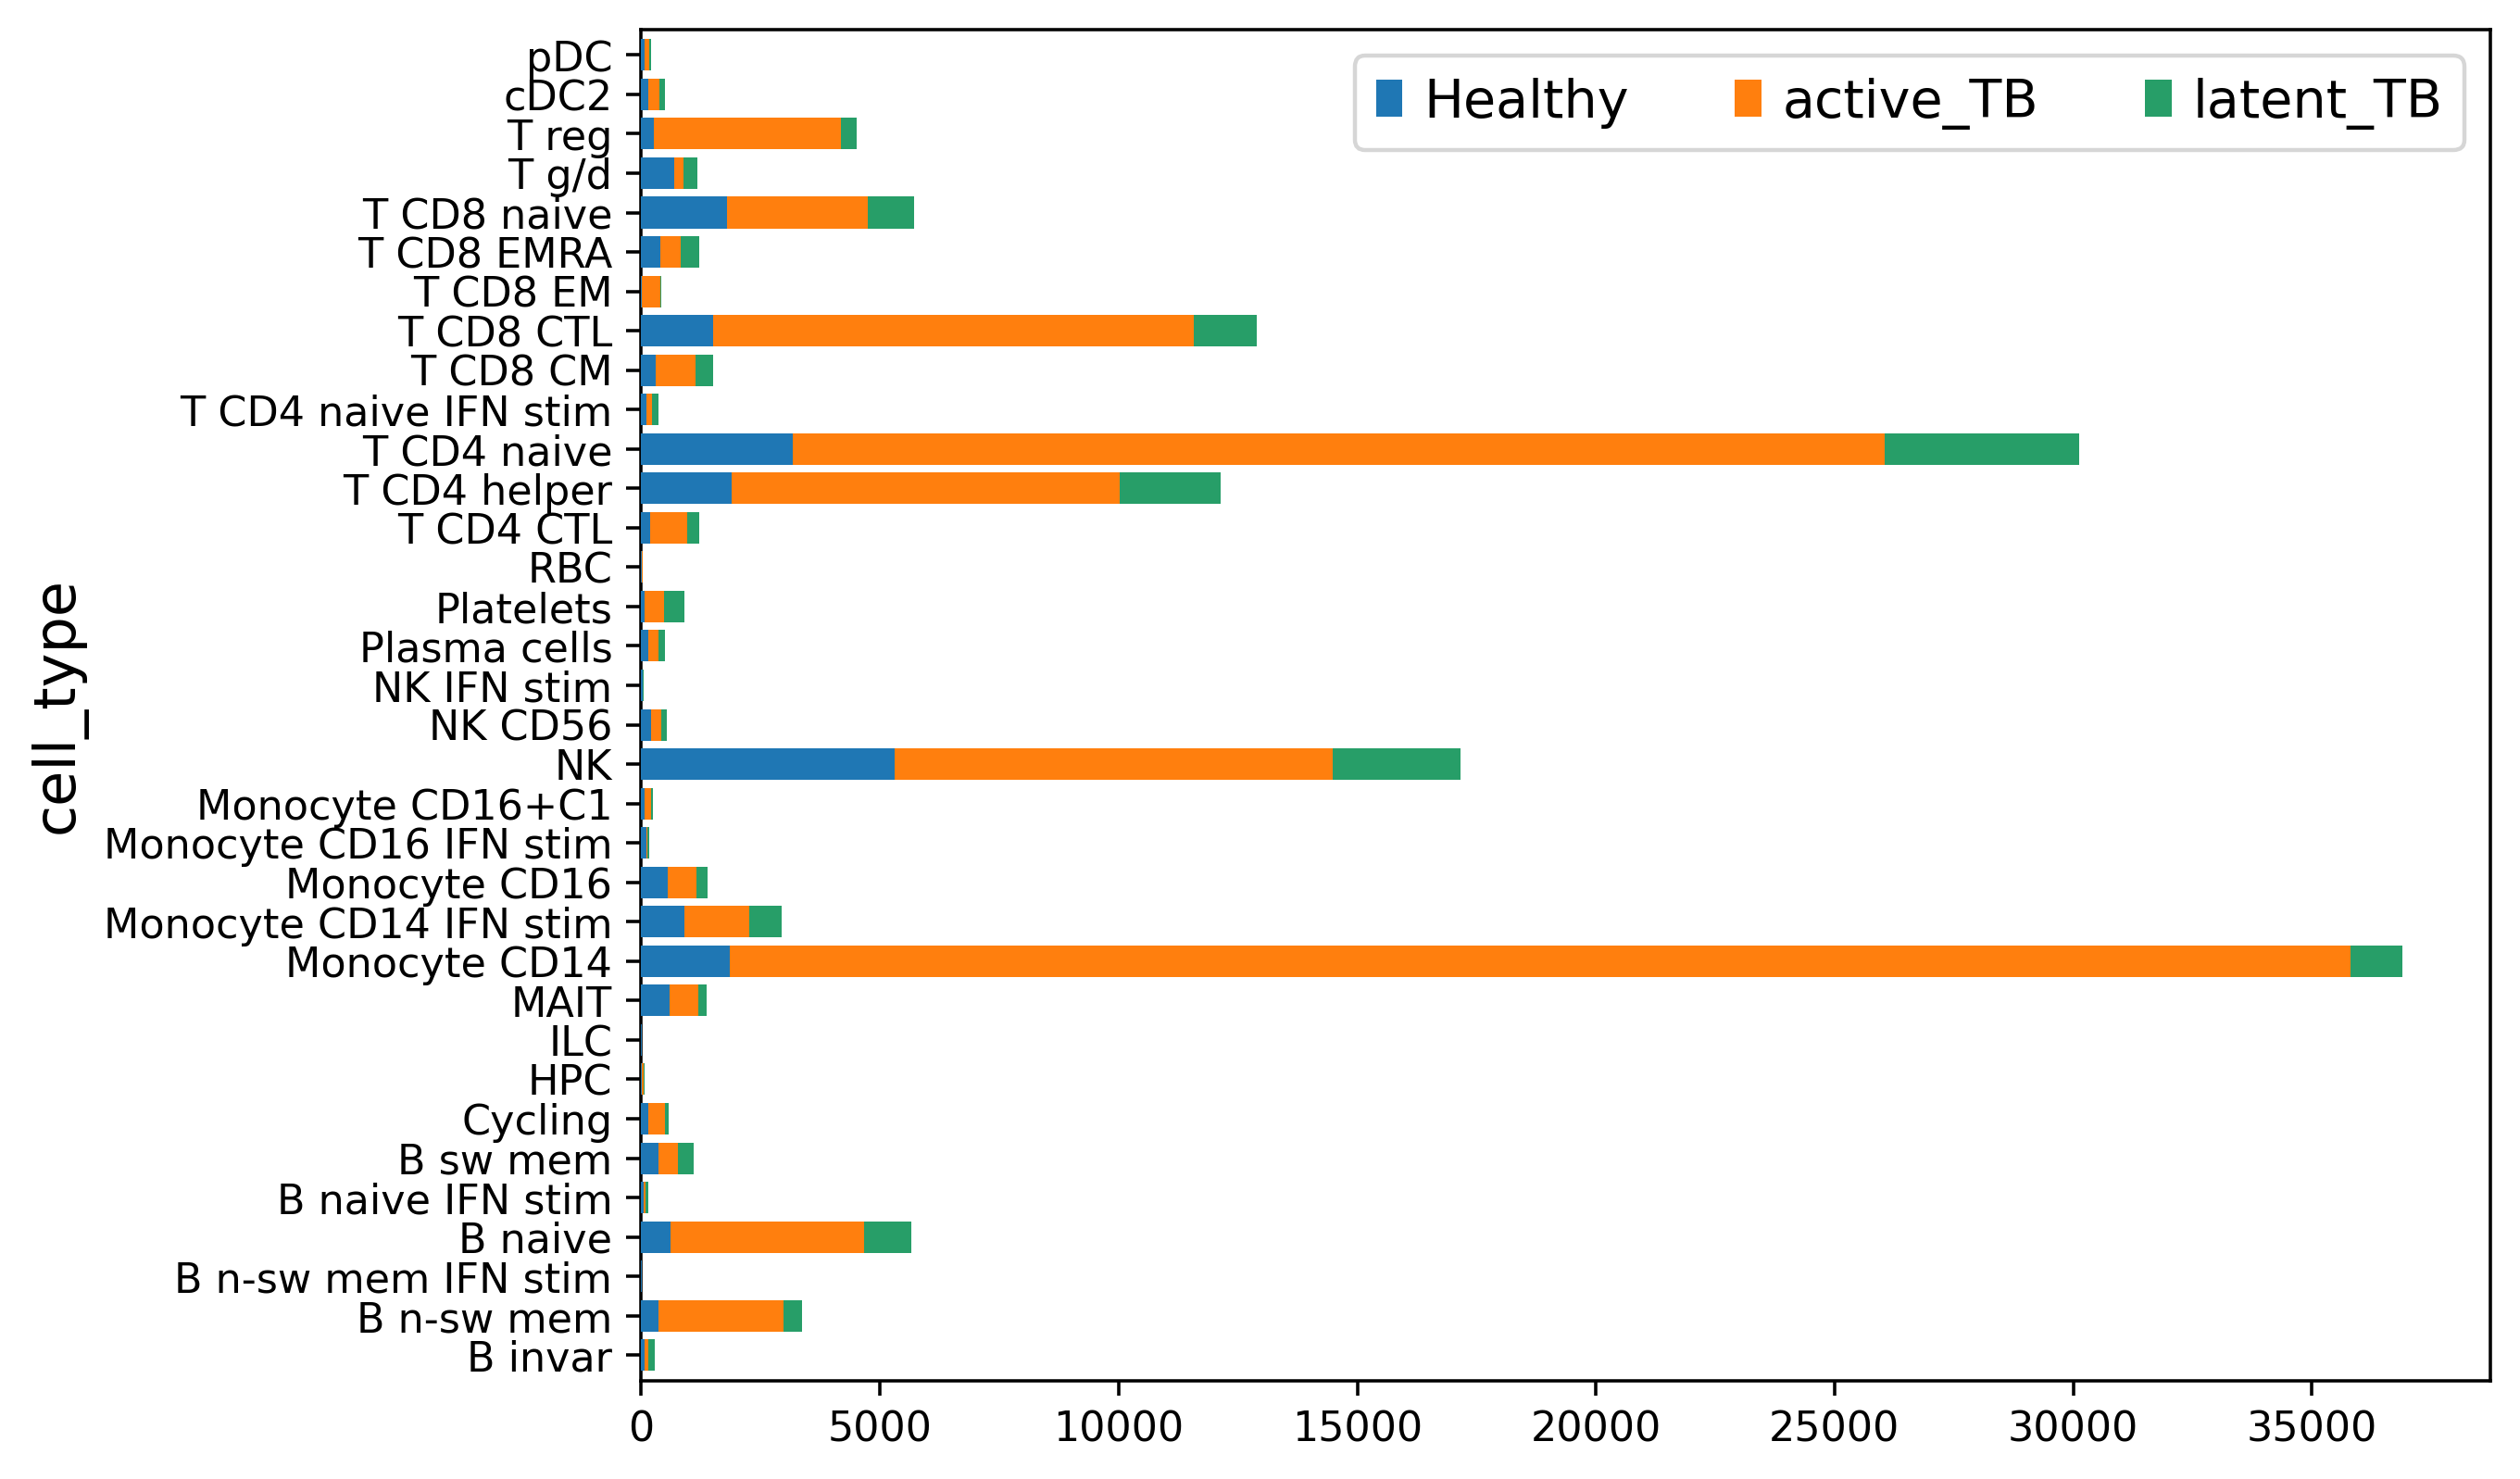

In [11]:
ax1 = pd.crosstab(tb_pbmc.obs['cell_type'], tb_pbmc.obs['status']).plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (8,6), fontsize = 10, grid = False, width = 0.8)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 3)

In [12]:
ax1 = pd.crosstab(sc_copd.obs['scNym'], sc_copd.obs['group']).plot.barh(stacked = False, edgecolor = 'none', zorder = 3, figsize = (14,8), fontsize = 8, grid = False, width = 0.8)
horiz_offset = 1.0
vert_offset = 1.0
ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset), ncol = 1)

NameError: name 'sc_copd' is not defined

In [ ]:
table = pd.crosstab(sc_copd.obs['scNym'], sc_copd.obs['group'])
table_melted = pd.melt(table)
table_melted.head()

In [ ]:
sns.boxplot(x = "group", y = "value", data = table_melted)